In [1]:
!pip install numba


     |████████████████████████████████| 3.4 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 25.3 MB 33.9 MB/s eta 0:00:01    |███████▋                        | 6.0 MB 33.9 MB/s eta 0:00:01     |██████████████████████          | 17.4 MB 33.9 MB/s eta 0:00:01


In [2]:

import numpy as np
from numpy import *                         
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 
from numba import jit, njit #libreria numba, me permite que el programa se ejecute más rápido. 
#---------------------------- Liberias -----------------------------------------

import math
import random #Liberia para generar numeros aleatorios
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing 
import multiprocessing as mp
from multiprocessing import Pool
from multiprocessing import Process, Lock
from time import perf_counter
import pandas as pd
multiprocessing.cpu_count()

8

In [4]:
#-------------------------------------------- MÉTODO DE MONTE CARLO. --------------------------------------------

#----------------------------------------- Condiciones iniciales -------------------------------------------

V1=np.zeros((40,40),float) # potencial V por el método.

#-------------------------------------------- Programa ------------------------------------------------------

@njit #(parallel=True). ejecuta más rápido el programa. 
def Potencial(imax,jmax):
    np.random.seed(34)# Ya que utilizamos Numba.
    sum=0
    nrun=1000
    for k in range(nrun):
        i=imax
        j=jmax
        while(i<=40 and j<=40):
            r=np.random.rand() # Números aleatorios. 
            
            # A continuación se dan las condiciones de frontera para las problabilidades utilizadas por el 
            # método de diferencias finitas. 
            
            if (r>=0.0 and r<0.25): i=i+1 #Probabilidad para la posición i=i+1
            if (r>=0.25 and r<0.5): i=i-1 #Probabilidad para la posición i=i-1
            if (r>=0.5 and r<0.75): j=j-1 #Probabilidad para la posición j=j-1
            if (r>=0.75 and r<=1.0): j=j+1 #Probabilidad para la posición j=j+1


#----------------------------- Condiciones de frontera en el problema de Laplace. ----------------------------------------

            if (i==0.0):
                sum=sum+0.0
                break
        
            if (i==40):
                sum=sum+0.0
                break
    
            if (j==0.0): 
                sum=sum+0.0
                break
                
            if (j==40): 
                sum=sum+100
                break  

    return sum/nrun

if __name__=='__main__':
    pool = mp.Pool(multiprocessing.cpu_count())
    data = [[pool.apply(Potencial, args=(i,j)) for i in range(0,40)] for j in range(0,40)]
    rsult=np.savetxt('file.dat', data)
        #V[i,j]=Potencial(i,j)
    y_1=np.loadtxt('file.dat')

    yy=pd.DataFrame(y_1) # Archivos de la energía.



    p.close()
    print(rsult)
    print(yy)
    
tfin=perf_counter()
print(tfin)

None
      0     1     2     3     4     5     6     7     8     9   ...    30  \
0    0.0   0.0   0.0   0.0   0.0   0.0   0.1   0.1   0.2   0.2  ...   0.0   
1    0.0   0.0   0.2   0.2   0.3   0.3   0.5   0.5   0.5   0.5  ...   0.2   
2    0.1   0.1   0.3   0.4   0.3   0.6   0.7   0.6   0.7   0.8  ...   0.9   
3    0.1   0.2   0.4   0.4   0.5   0.5   0.8   1.1   1.2   1.5  ...   1.5   
4    0.2   0.3   0.4   0.6   0.4   1.2   1.2   1.3   1.5   1.7  ...   1.6   
5    0.2   0.3   0.5   0.7   1.1   1.3   1.3   2.0   2.5   2.0  ...   3.1   
6    0.2   0.4   0.7   0.7   1.1   1.5   1.5   2.2   2.4   3.0  ...   3.1   
7    0.3   0.7   0.9   1.2   1.6   2.1   2.3   2.9   3.3   3.8  ...   3.9   
8    0.3   0.8   0.9   1.9   1.9   2.5   2.9   3.8   3.6   4.4  ...   4.5   
9    0.3   0.6   1.2   1.9   2.3   2.7   4.0   4.0   4.1   5.1  ...   5.2   
10   0.3   0.7   1.3   2.2   2.7   3.3   4.3   4.1   5.1   5.3  ...   6.9   
11   0.4   0.7   1.5   2.3   3.0   4.0   3.9   4.9   4.9   5.5  ...   7

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

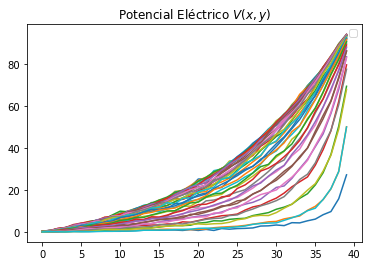

In [6]:
plt.title('Potencial Eléctrico $V(x,y)$')
plt.plot(yy)
plt.legend() # para que me muestre la leyenda en el gráfico.
plt.savefig('Potentialparallel.pdf') #Me guarda la imagen en formato .pdf
plt.show

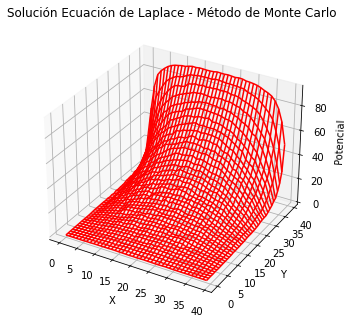

274212.353917516


In [7]:
x=np.arange(0,40,1) # Coordenada x, el cual es una rejilla de 40*40
y=np.arange(0,40,1) # Coordenada y. 

X,Y=np.meshgrid(x,y)
fig=p.figure()
ax=Axes3D(fig)
ax.plot_wireframe(X,Y,yy, color='r')
ax.set_title('Solución Ecuación de Laplace - Método de Monte Carlo')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potencial')
plt.savefig('parallel.pdf') #Me guarda la imagen en formato .pdf
p.show()
tin2=perf_counter()
print(tin2)